# Problem Statement: 
### HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
import warnings
warnings.simplefilter("ignore")

# Loading Dataset

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Country-data.csv")
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
print("Number of Rows : ",df.shape[0],", Number of Columns : ",df.shape[1])

Number of Rows :  167 , Number of Columns :  10


In [5]:
df.columns
df.columns.tolist()

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

# About Dataset
## Columns (Features):

country: Name of the country

child_mort: Death of children under 5 years of age per 1000 live births

exports: Exports of goods and services per capita. Given as %age of the GDP per capita

health: Total health spending per capita. Given as %age of GDP per capita

imports: Imports of goods and services per capita. Given as %age of the GDP per capita

income: Net income per person

inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

### Target : We want to set Clusters, clustering the Countries by using Unsupervised Learning for HELP International Objective to categorise the countries using socio-economic and health factors that determine the overall development of the country.

# 🔍 📈 EDA and PREPROCESSING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [8]:
df.describe(include=['object'])

country
count           167
unique          167
top     Afghanistan
freq              1

In [9]:
!pip install -U kaleido

In [10]:
import kaleido
import plotly.express as px
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='country',
                         title=i+' per country (World)',color=i,color_continuous_scale="Reds")
    #fig.write_html(f"Interactive-plots_World_{i}.html")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [11]:
#focus on Europe
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='country',
                        color=i, title=i+' per country (Europe)',scope='europe',color_continuous_scale="Greens")
    #fig.write_html(f"Interactive-plots_Europe_{i}.html")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [12]:
#focus on Asia
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='country',
                        color=i, title=i+' per country (Asia)',scope='asia',color_continuous_scale="PuBu")
    #fig.write_html(f"Interactive-plots_Europe_{i}.html")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

## Searching for missing values

In [13]:
# Finding unique values in columns to determine if there is any missing values including (-,?...)
df.loc[df.index.isin(['?','-'])].value_counts()

Series([], Name: count, dtype: int64)

In [14]:
 df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Searching for duplicate values

In [15]:
print(f"Number of dublicated: {df.duplicated().sum()}")
print(f"number of rows: {df.shape}")
print(f"number of duplicate rows: {df[df.duplicated()].shape}")

Number of dublicated: 0
number of rows: (167, 10)
number of duplicate rows: (0, 10)


# Correlation

In [16]:
df1=df.iloc[:,1:].apply(pd.to_numeric,errors='coerce')

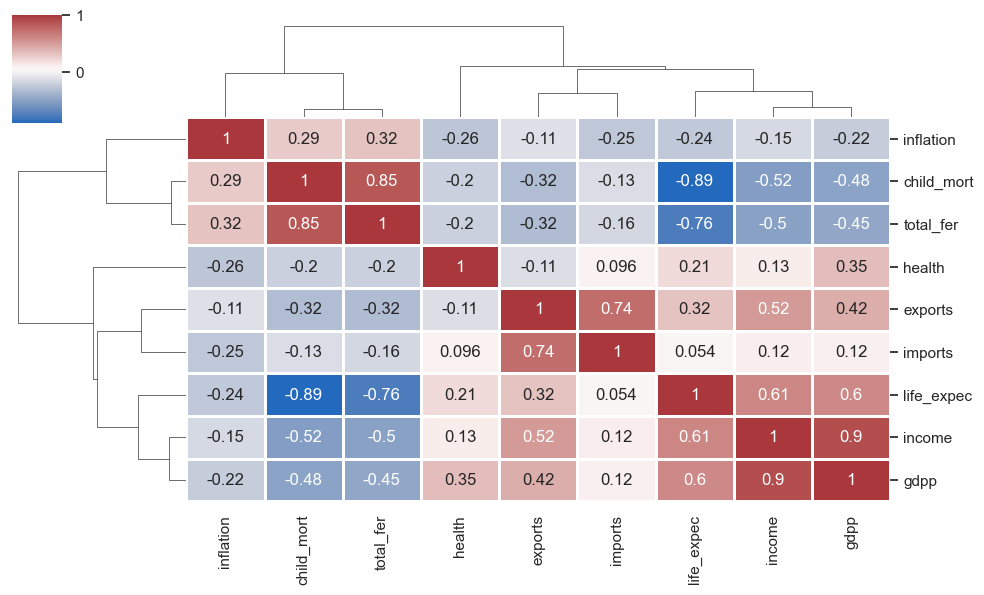

In [17]:
sns.set(style="white", context="notebook")

# Generate the cluster map
sns.clustermap(df1.corr(), cmap="vlag", dendrogram_ratio=(0.2, 0.2), annot=True, linewidths=0.8, figsize=(10, 6))

# Show the plot
plt.show()

Many features have relationships with each other.

child_mort clearly increases when income, gdpp & exports decrease. The rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!

The rise in exports clearly increases gdpp, income & imports.

Spending on health has a small rise in life_expec and also decreases the child_mort.

income & gdpp display a very high 0.9 correlation value. From the health perspective, high income has led to a higher life_expec but decreases the total_fer by some significant margin.

As expected high inflation has a negative effect on financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.

According to the data, higher life_expec displays a low total_fer. Higher gdpp has led to more spending on health.

## I define a function to plot three kind of plots for each column

In [18]:
def My_Plot (Col):
    
    fig = plt.subplots(nrows = 1,ncols = 3,figsize = (22,4))
    plt.subplot(1,3,1)
    ax = sns.barplot(x = 'country',y = Col, data = df.sort_values(ascending = False,by = Col).iloc[:5],edgecolor = 'black', palette = 'magma');
    plt.xlabel('country', color = 'r', fontsize = 16)
    plt.ylabel(Col, color = 'r',fontsize = 16)
    plt.xticks(rotation = 90, fontsize = 16)
    plt.title('Countries with High '+ Col, fontsize = 18)

    plt.subplot(1,3,2)
    ax = sns.barplot(x = 'country',y = Col, data = df.sort_values(ascending = False,by = Col).iloc[81:86],edgecolor = 'black', palette = 'Blues');
    plt.title('Countries with Medial '+ Col, fontsize = 18)
    plt.xlabel('country', color = 'r', fontsize = 16)
    plt.ylabel(Col, color = 'r',fontsize = 16)
    plt.xticks(rotation = 90, fontsize = 16)
    
    plt.subplot(1,3,3)
    ax = sns.barplot(x = 'country',y = Col, data = df.sort_values(ascending = False,by = Col).iloc[161:166],edgecolor = 'black', palette = 'YlOrRd');
    plt.title('Countries with Low '+ Col, fontsize = 18)
    plt.xlabel('country', color = 'r', fontsize = 16)
    plt.ylabel(Col, color = 'r',fontsize = 16)
    plt.xticks(rotation = 90, fontsize = 16)
    
    plt.show()


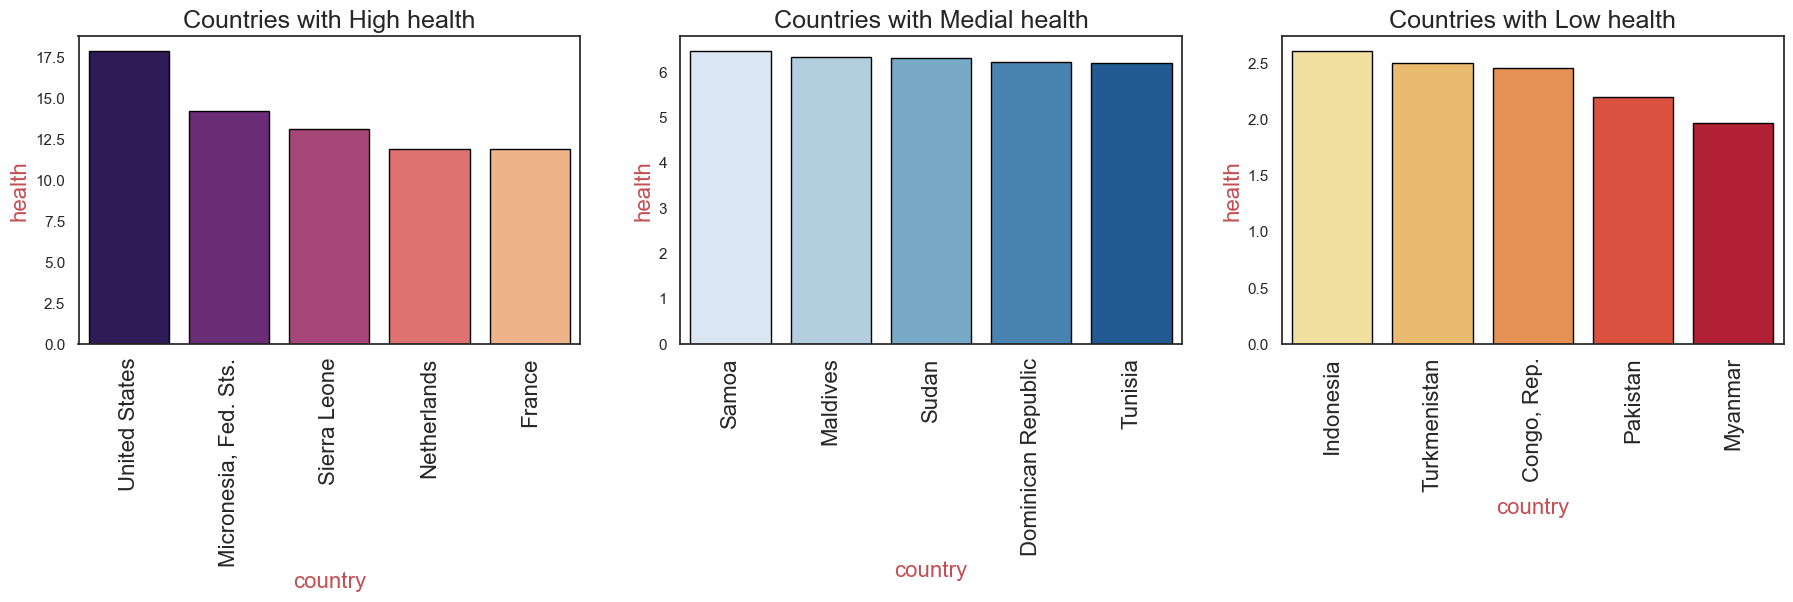

In [19]:
My_Plot ('health')

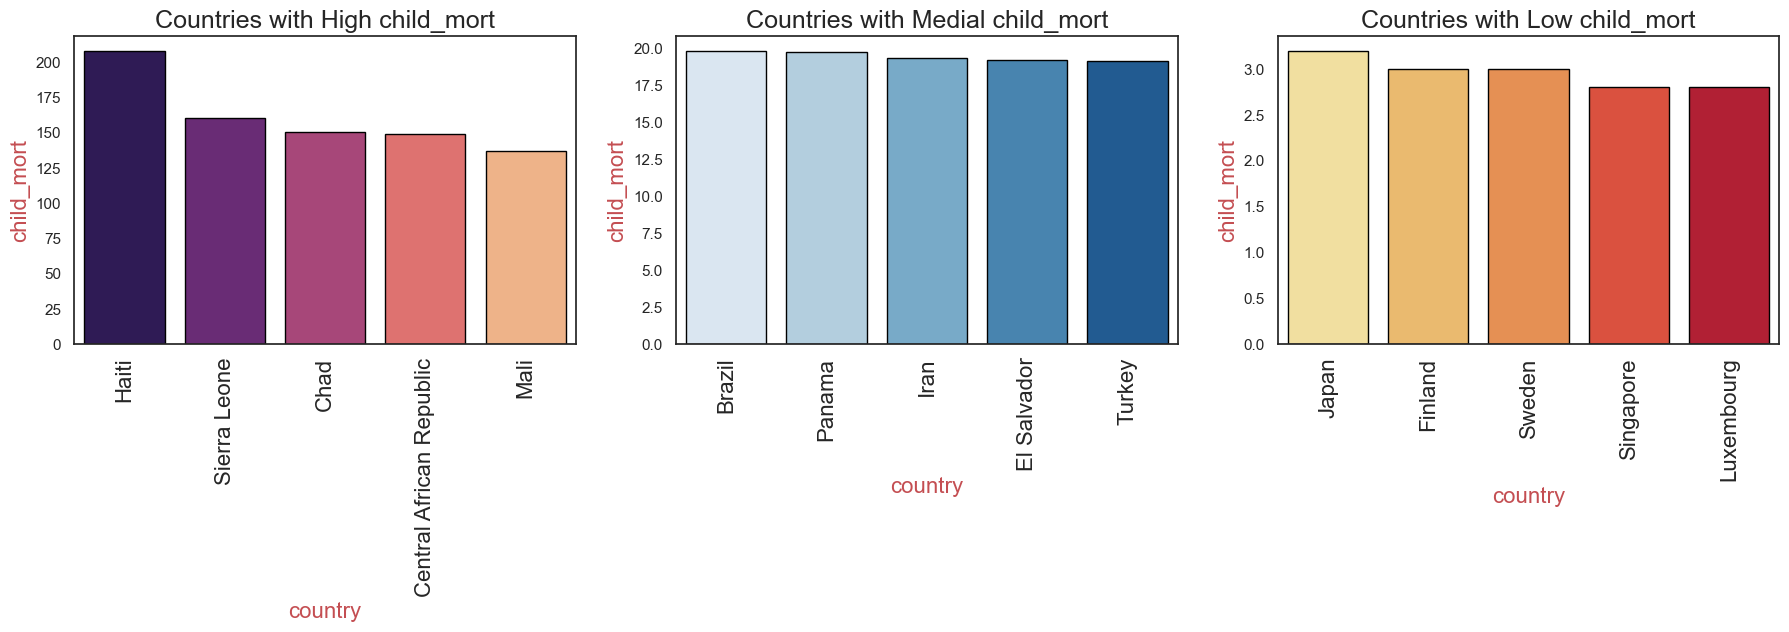

In [20]:
My_Plot ('child_mort')

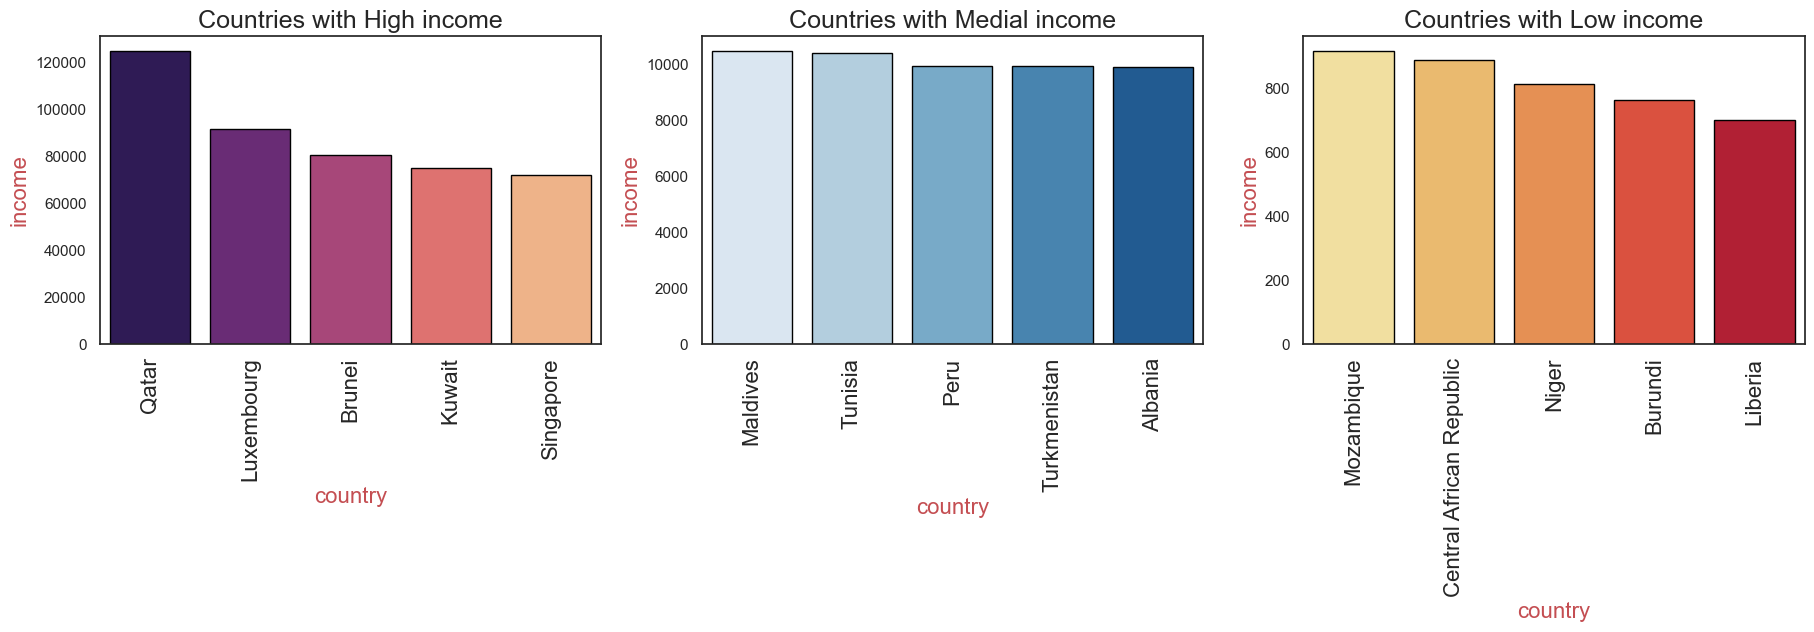

In [21]:
My_Plot ('income')


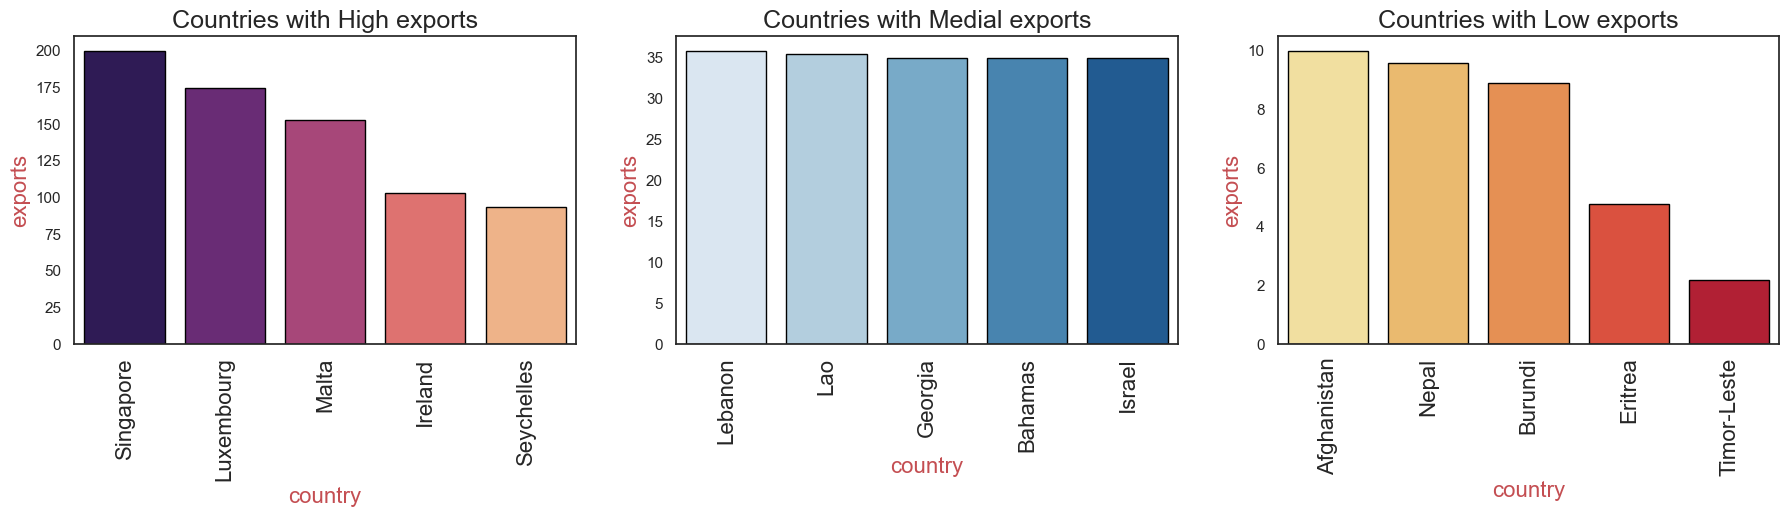

In [22]:
My_Plot ('exports')


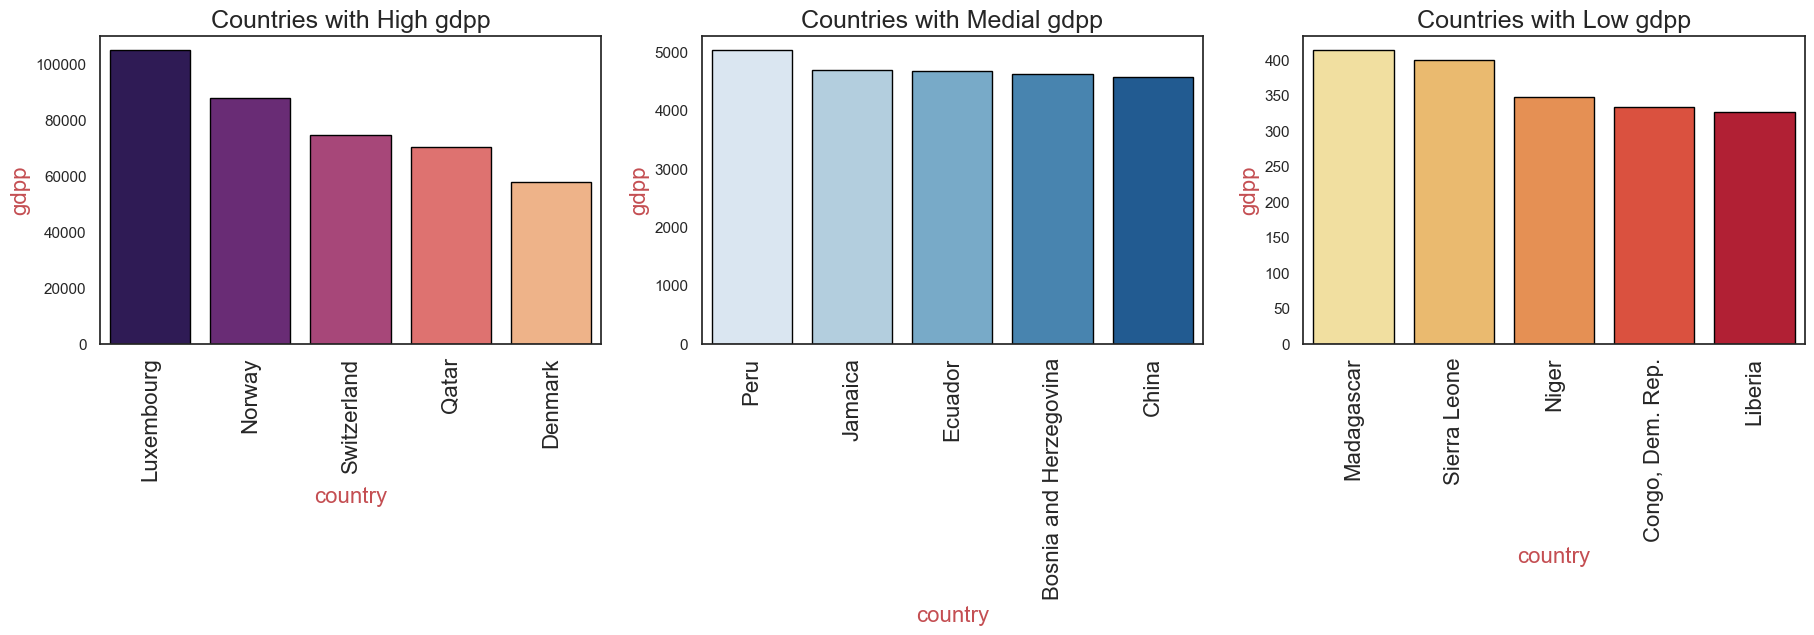

In [23]:
My_Plot ('gdpp')

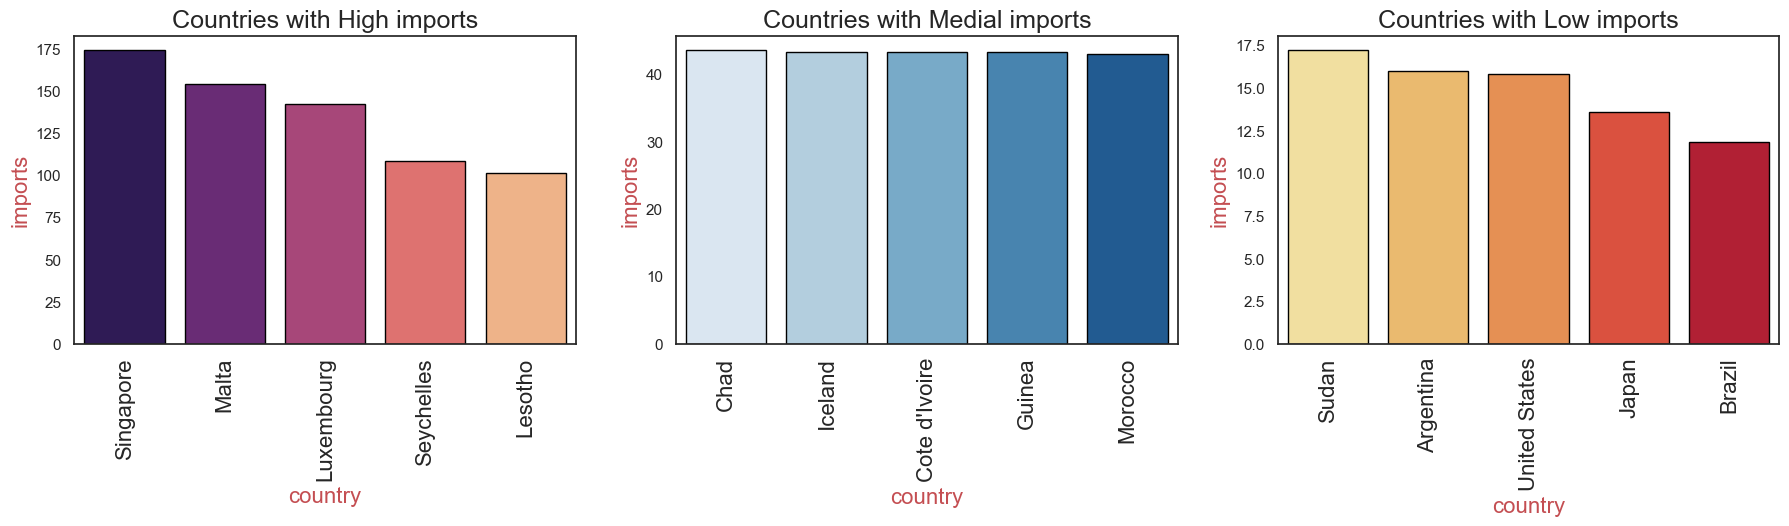

In [24]:
My_Plot ('imports')

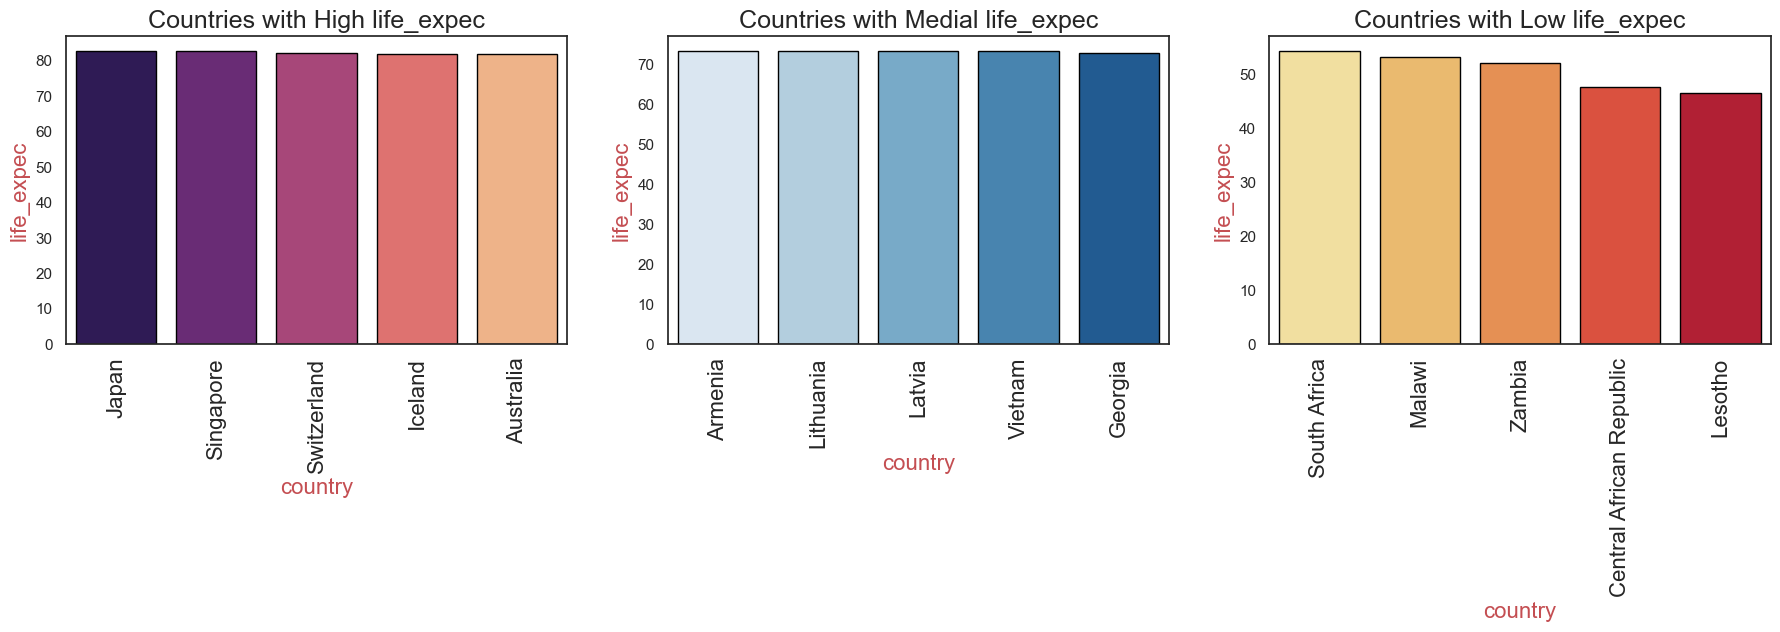

In [25]:
My_Plot ('life_expec')

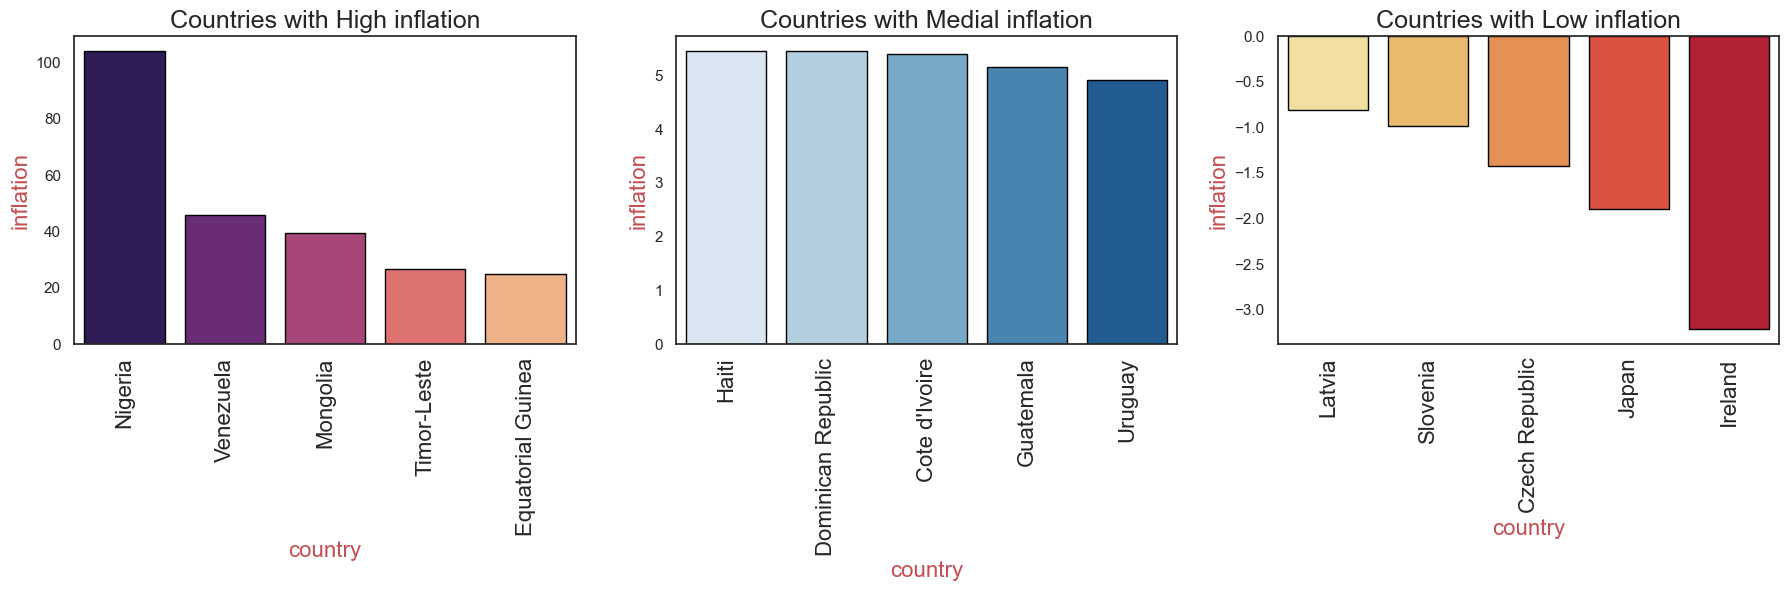

In [26]:
My_Plot ('inflation')

## Bivariate Analysis

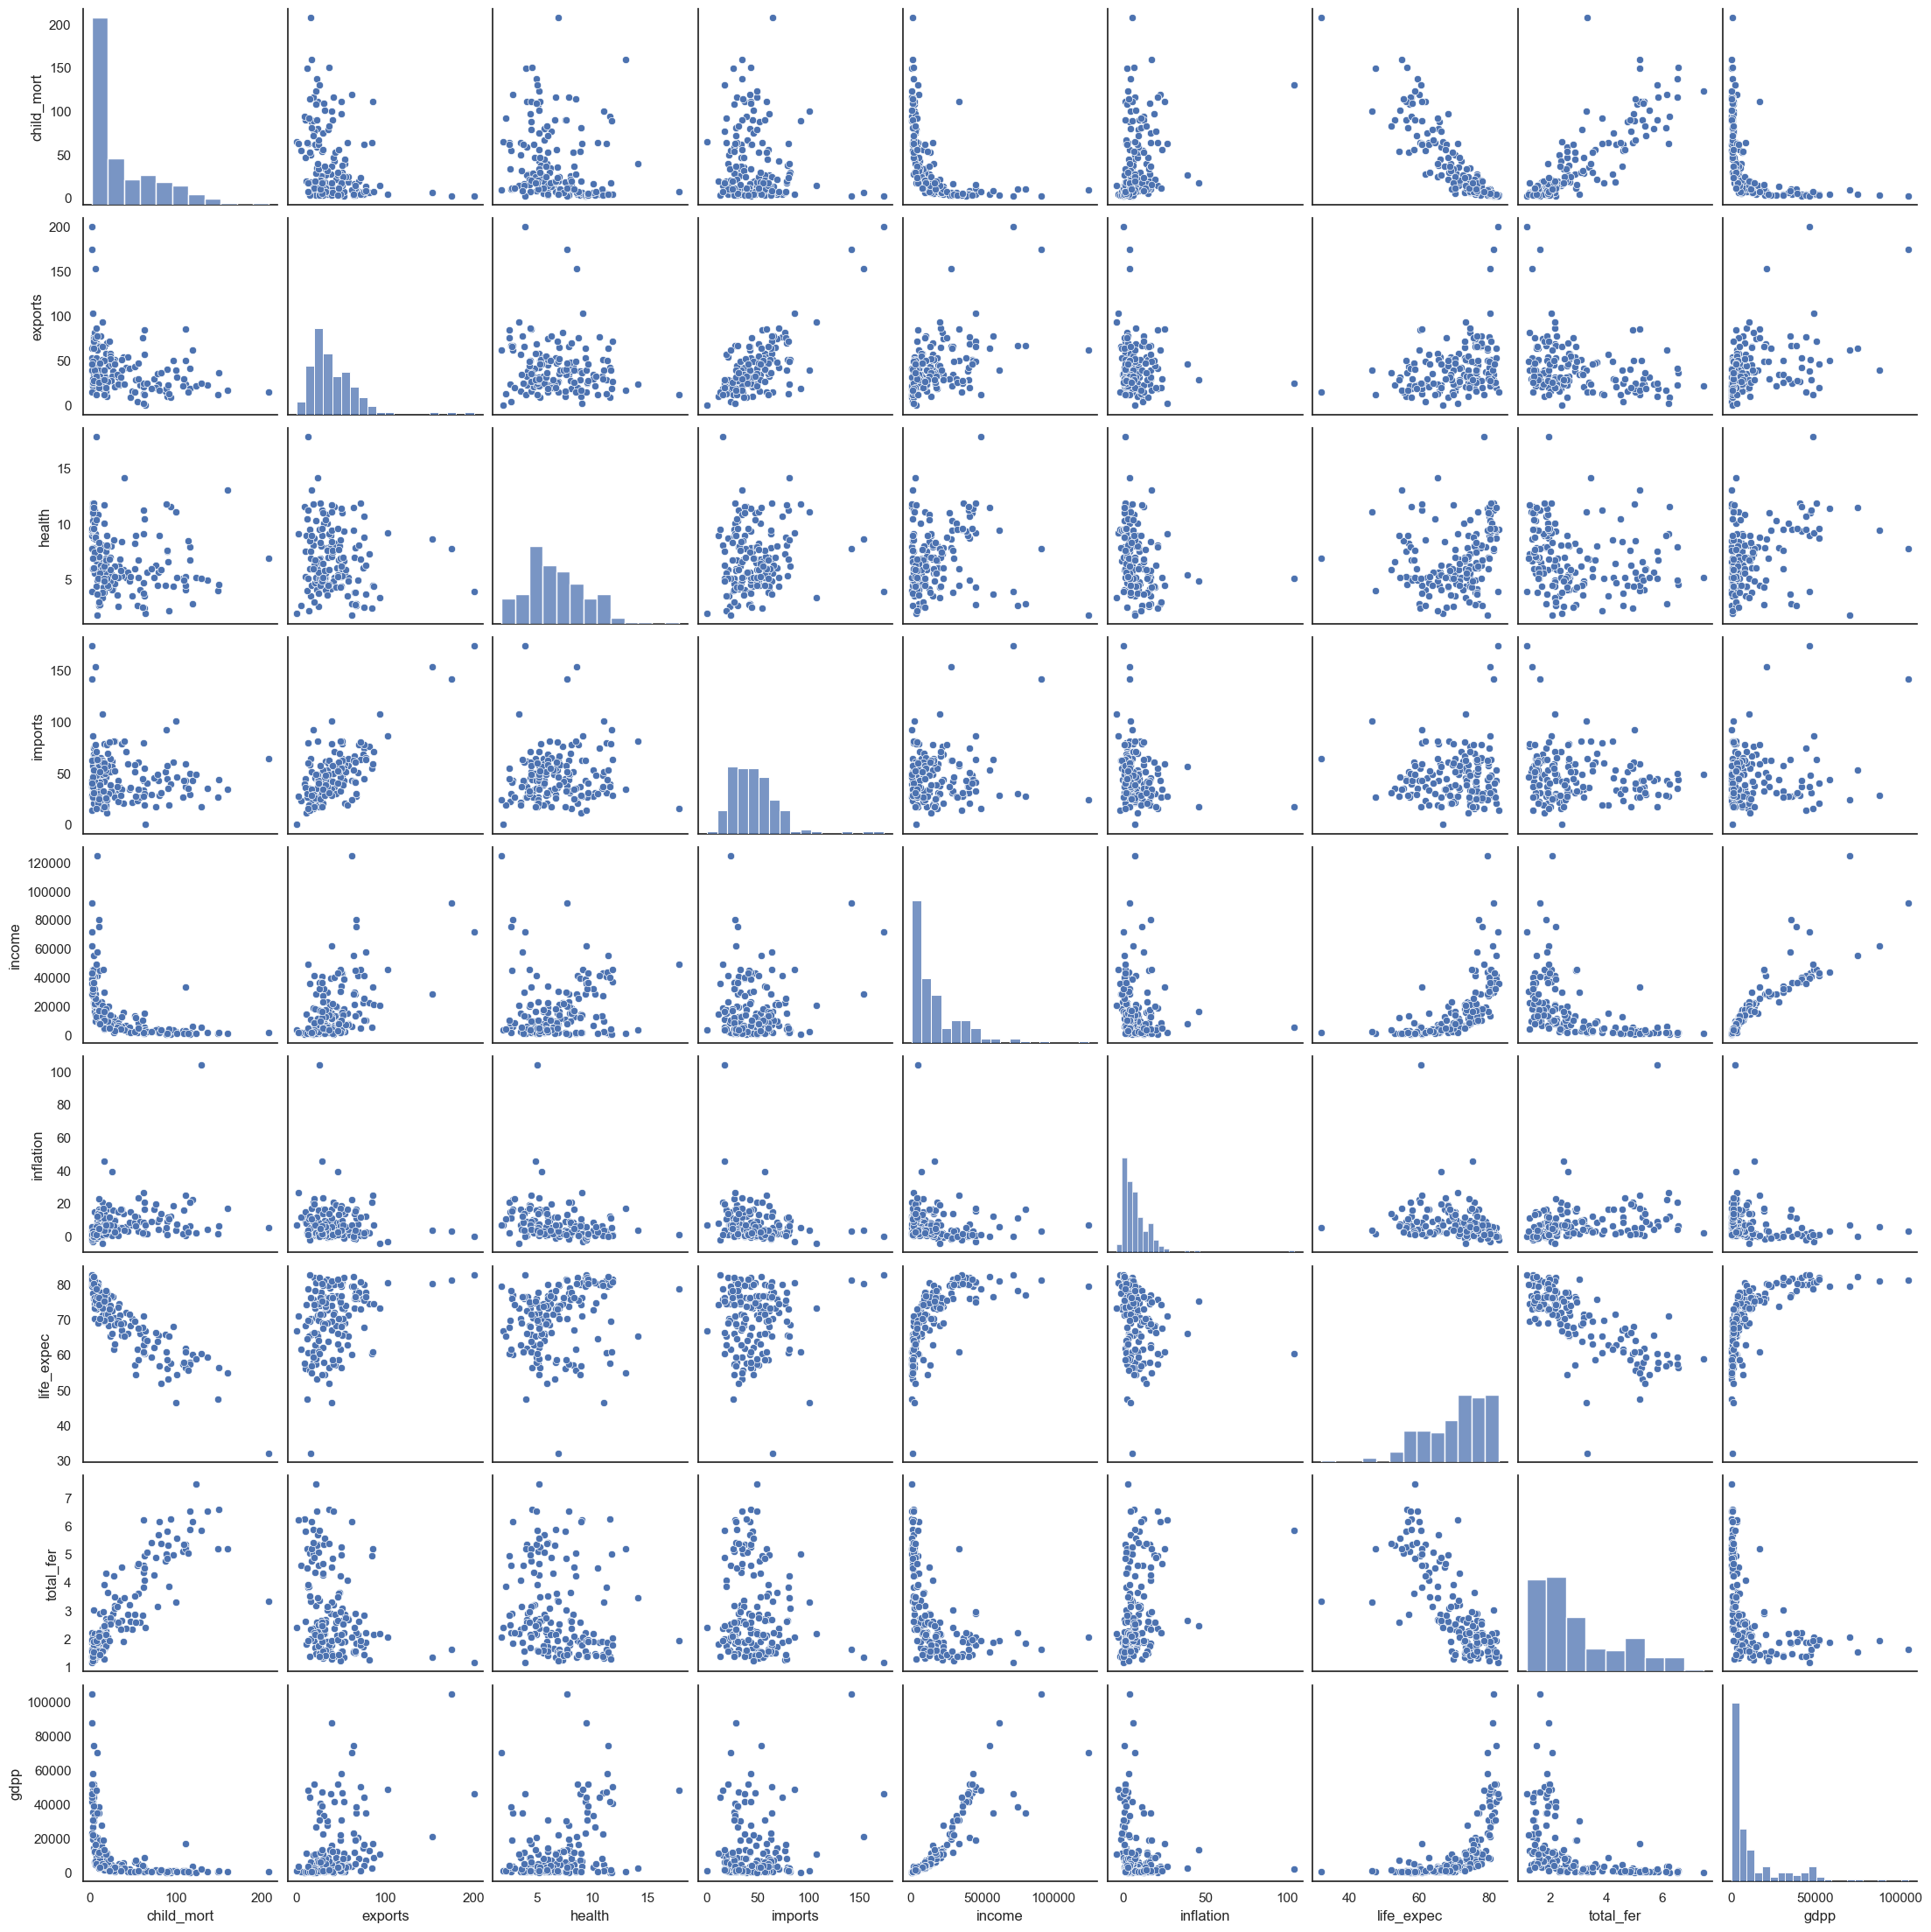

In [27]:
sns.pairplot(df)

## Univariate Analysis

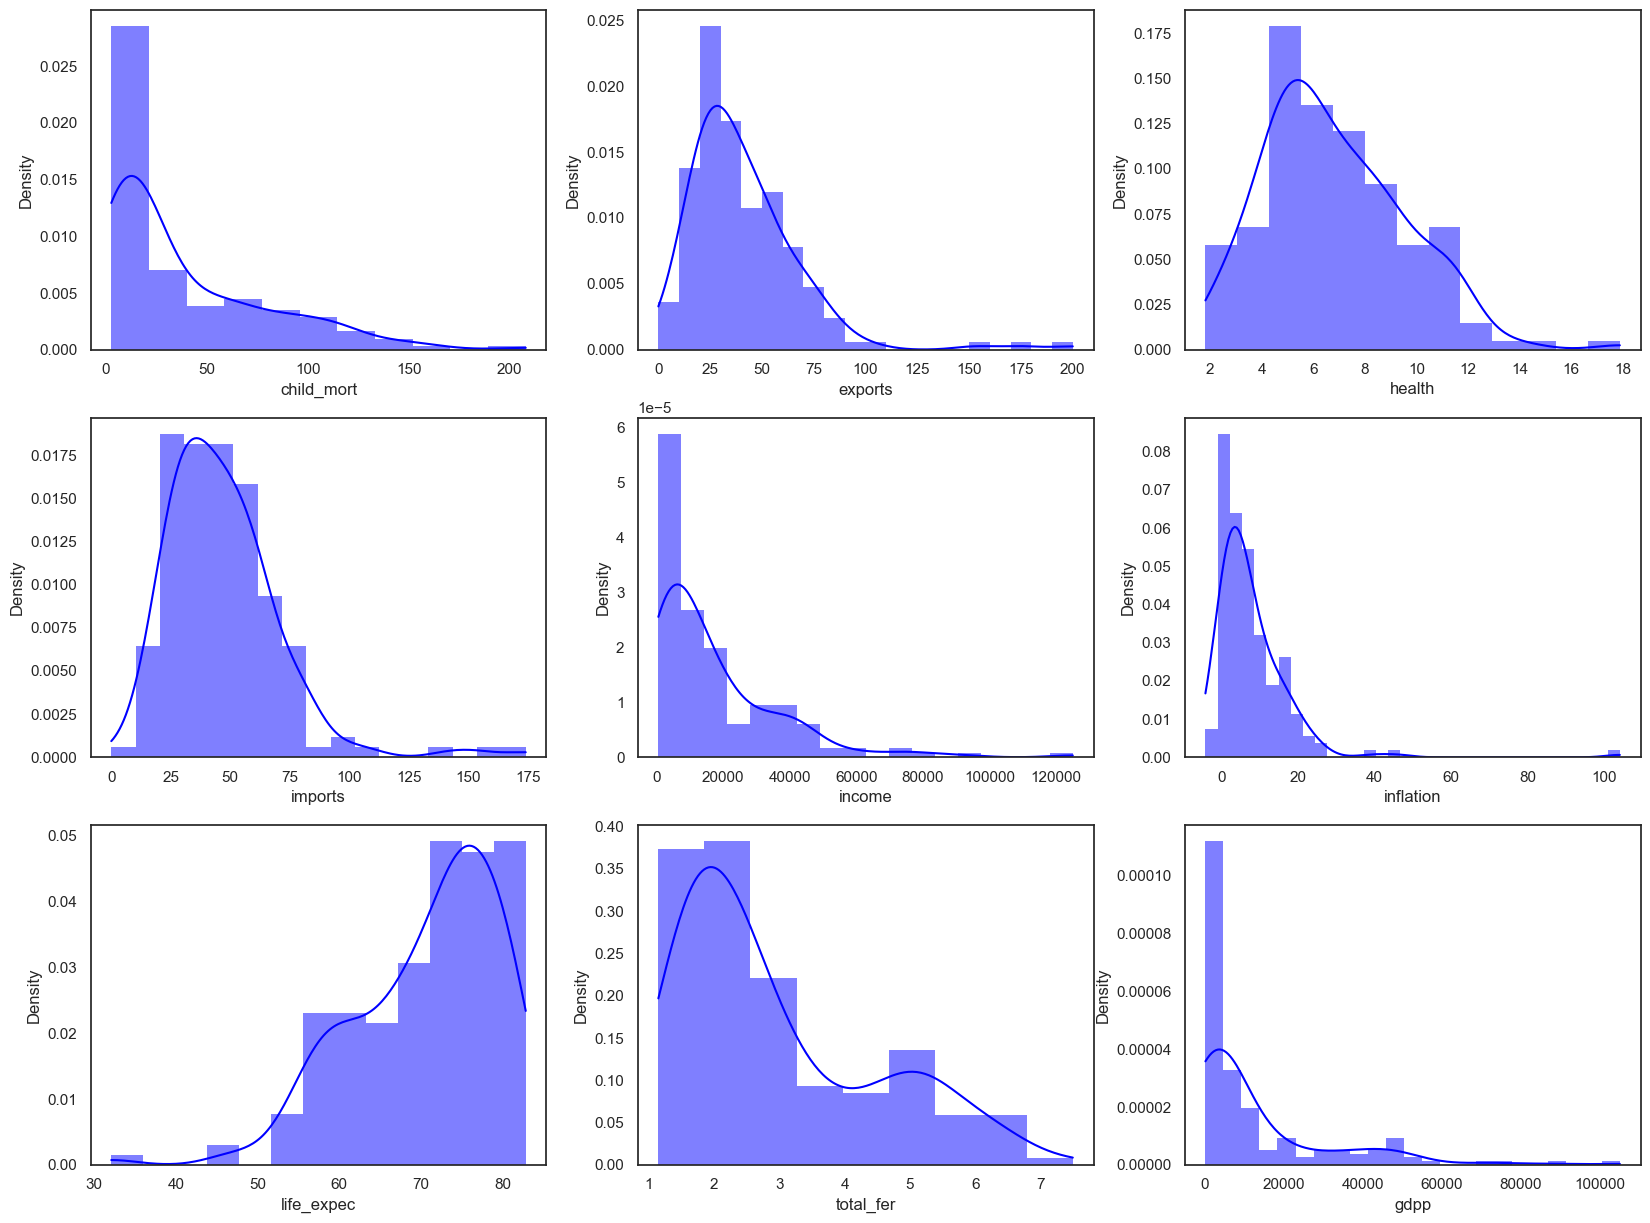

In [28]:
plt.figure(figsize=(20,15))
for i, col in enumerate(df.drop('country', axis=1).columns):
    ax = plt.subplot(3, 3, i+1)   
    sns.histplot(df[col], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0) 
plt.show()

In [29]:
df.drop('country', axis=1).skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

### - Life_expec displays a left or negatively skewed data distribution.

### - Health displays a normally distrubuted data.

### - All the remaining features show a right or positively skewed data distribution.

## Searching for outliers

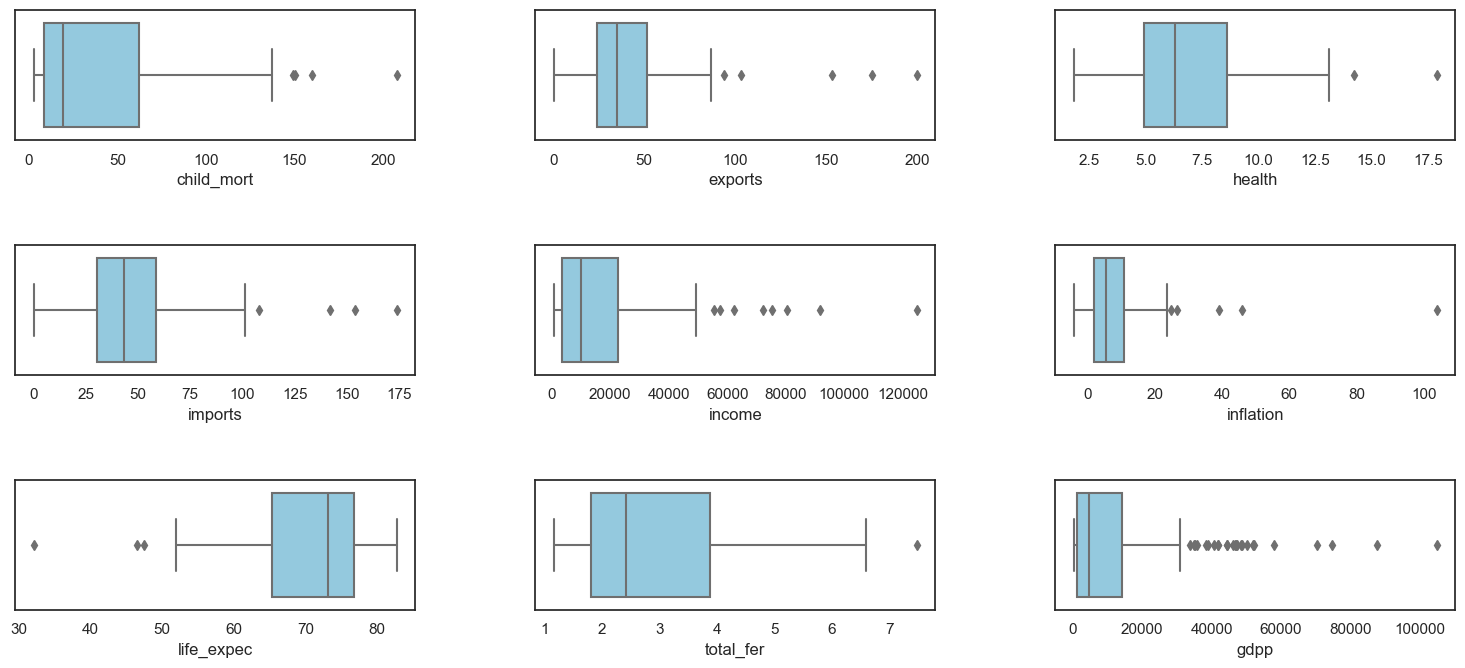

In [30]:
plt.subplots(figsize=(18, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.5, wspace=0.3, hspace=0.8)

for i, column in enumerate(df.drop('country', axis=1).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = df[column], color='skyblue')

Box plot shows that there are clear outliers in child_mort, exports, imports, income, gdpp features. however, these informations are belongs to each country. so, we can't expect the values to be normaly distributed wihtout outliers. We do not remove the outliers as our dataset is samll.

# PCA

## Scaling the data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled=pd.DataFrame(df_scaled,columns=df.iloc[:,1:].columns, index=df.index )
df_final=pd.concat([df.iloc[:,0],df_scaled],axis=1)
df_final

country  child_mort   exports    health   imports    income  \
0            Afghanistan    1.291532 -1.138280  0.279088 -0.082455 -0.808245   
1                Albania   -0.538949 -0.479658 -0.097016  0.070837 -0.375369   
2                Algeria   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   
3                 Angola    2.007808  0.775381 -1.448071 -0.165315 -0.585043   
4    Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.101732   
..                   ...         ...       ...       ...       ...       ...   
162              Vanuatu   -0.225578  0.200917 -0.571711  0.240700 -0.738527   
163            Venezuela   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   
164              Vietnam   -0.372315  1.130305  0.008877  1.380030 -0.658404   
165                Yemen    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   
166               Zambia    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   

     inflation  life_expec  total_fer      gdpp  
0     0.157336   -1.619092   1.902882 -0.679180  
1    -0.312347    0.647866  -0.859973 -0.485623  
2     0.789274    0.670423  -0.038404 -0.465376  
3     1.387054   -1.179234   2.128151 -0.516268  
4    -0.601749    0.704258  -0.541946 -0.041817  
..         ...         ...        ...       ...  
162  -0.489784   -0.852161   0.365754 -0.546913  
163   3.616865    0.546361  -0.316678  0.029323  
164   0.409732    0.286958  -0.661206 -0.637754  
165   1.500916   -0.344633   1.140944 -0.637754  
166   0.590015   -2.092785   1.624609 -0.629546  

[167 rows x 10 columns]

In [32]:
df_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [33]:
from sklearn.decomposition import PCA

# Obtain the principal components
pca = PCA(svd_solver='randomized', random_state=42)
principal_comp = pca.fit_transform(df_scaled)

In [34]:
# PCA components created 
print('pca.components:\n', pca.components_)
print('------------------------------------------------------------\n')
# Variance Ratio
print('pca.explained_variance_ratio_:\n', pca.explained_variance_ratio_)

pca.components:
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02523614
   0.2

In [35]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2','pca3', 'pca4','pca5', 'pca6','pca7', 'pca8', 'pca9'])
pca_df

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310 -0.254597  0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677  0.084579  0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475 -0.401696 -0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209 -0.547996 -0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007 -0.206919  0.241978   
..        ...       ...       ...       ...       ...       ...       ...   
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748  0.009059 -0.098738   
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581  0.097274  0.206735   
164  0.498524  1.390744 -0.238526 -1.074098  1.176081  0.051607 -0.143627   
165 -1.887451 -0.109453  1.109752  0.056257  0.618365 -0.540917  0.060256   
166 -2.864064  0.485998  0.223167  0.816364 -0.274068  0.201378 -0.442185   

         pca8      pca9  
0    0.415076 -0.014148  
1   -0.221042  0.173316  
2   -0.184162  0.084037  
3   -0.355998 -0.091339  
4   -0.023681  0.094270  
..        ...       ...  
162  0.521886 -0.497803  
163 -0.078805 -0.275735  
164 -0.217590 -0.036522  
165  0.089495 -0.096049  
166  0.664338 -0.441482  

[167 rows x 9 columns]

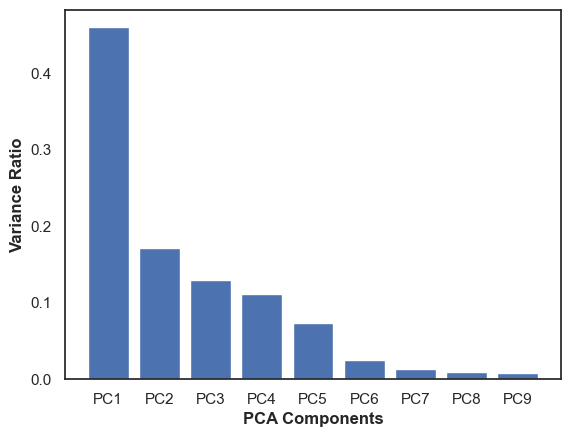

In [36]:
# Variance Ratio bar plot for each PCA components.
PCs_explained_variance = np.array(pca.explained_variance_ratio_)
labels = ['PC' + str(x) for x in range (1, len(PCs_explained_variance)+1)]

plt.bar(x=range(1,len(PCs_explained_variance)+1), height = PCs_explained_variance, tick_label = labels)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')
plt.show()

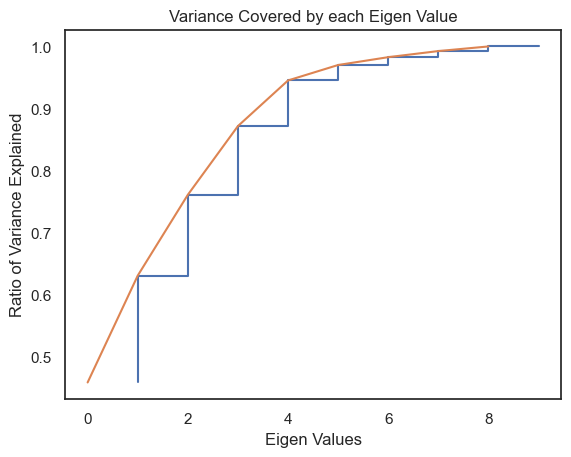

In [37]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

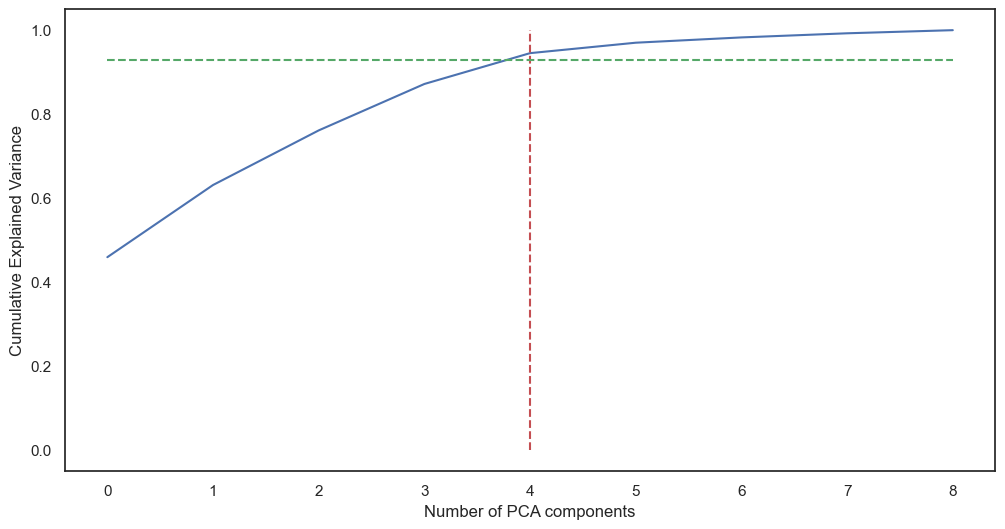

In [38]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_varianceratio variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

With first component variance explained is almost 60%.

For second component variance explained is almost 20%.
    
Typically eigen values with more than 95% of ratio of variance are selected.

In this case, we select the Eigen Value : 4 as the steps generated have significant variances and thus the other features get dominated by their variances.

In [39]:
pca_df2 = pca_df.drop(columns = ['pca5','pca6','pca7','pca8','pca9'])
pca_df2.head()

pca1      pca2      pca3      pca4
0 -2.913025  0.095621 -0.718118  1.005255
1  0.429911 -0.588156 -0.333486 -1.161059
2 -0.285225 -0.455174  1.221505 -0.868115
3 -2.932423  1.695555  1.525044  0.839625
4  1.033576  0.136659 -0.225721 -0.847063

## We want to show how well features are explained by PCs.

In [40]:
# Checking which attributes are well explained by the pca components
org_col = list(df.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2], 'PC_4':pca.components_[3]})
attributes_pca

Attribute      PC_1      PC_2      PC_3      PC_4
0  child_mort -0.419519  0.192884 -0.029544  0.370653
1     exports  0.283897  0.613163  0.144761  0.003091
2      health  0.150838 -0.243087 -0.596632  0.461897
3     imports  0.161482  0.671821 -0.299927 -0.071907
4      income  0.398441  0.022536  0.301548  0.392159
5   inflation -0.193173 -0.008404  0.642520  0.150442
6  life_expec  0.425839 -0.222707  0.113919 -0.203797
7   total_fer -0.403729  0.155233  0.019549  0.378304
8        gdpp  0.392645 -0.046022  0.122977  0.531995

<Axes: xlabel='Attribute'>

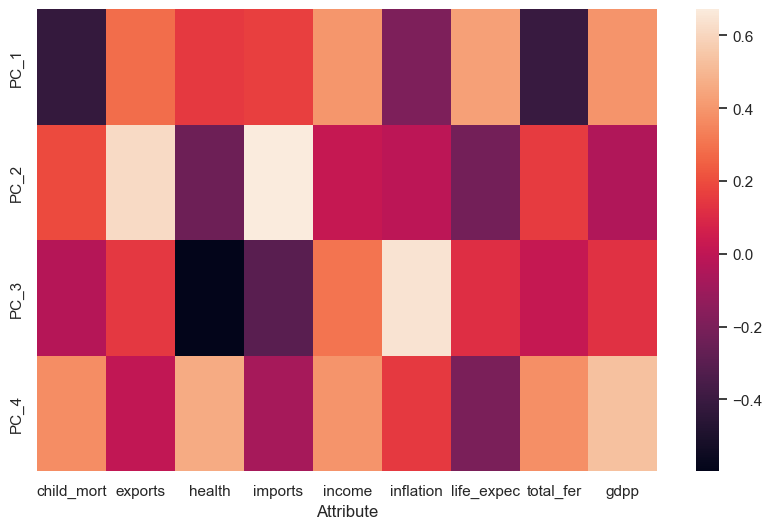

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(attributes_pca.set_index('Attribute').T)

## We want to show an example of how well some features are explained by PC1 & PC2

<Figure size 600x400 with 0 Axes>

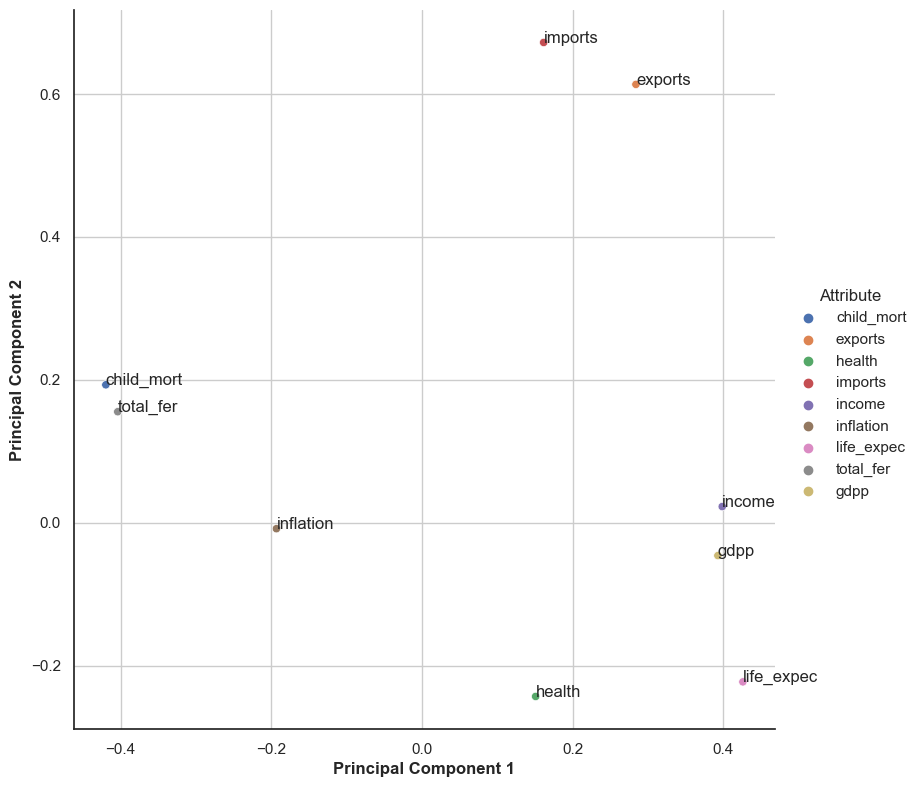

In [42]:
fig = plt.figure(figsize=(6, 4))

# Use sns.pairplot to create the plot
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue="Attribute", height=8)

# Add labels
plt.xlabel("Principal Component 1", fontweight='bold')
plt.ylabel("Principal Component 2", fontweight='bold')

# Add annotations for each point
for i, txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i], attributes_pca.PC_2[i]))

# Add gridlines
plt.grid(True)

- life expectency, income, gdpp and health are very well explained by PC1.

- imports and exports are well explained by both the components PC1 and PC2.

- child mortality and total fertility are well explained by PC2.

- inflation is neither explained by PC1 nor with PC2

## Final Model

In [43]:
# selecting PC1, PC2, PC3 and PC4
pca = PCA(n_components = 4) 
DF_pca = pca.fit_transform(df_scaled) 
DF_pca  = pd.DataFrame(DF_pca ) 
DF_pca.columns = ['P1', 'P2', 'p3', 'p4'] 
DF_pca

P1        P2        p3        p4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

# KMeans + PCA

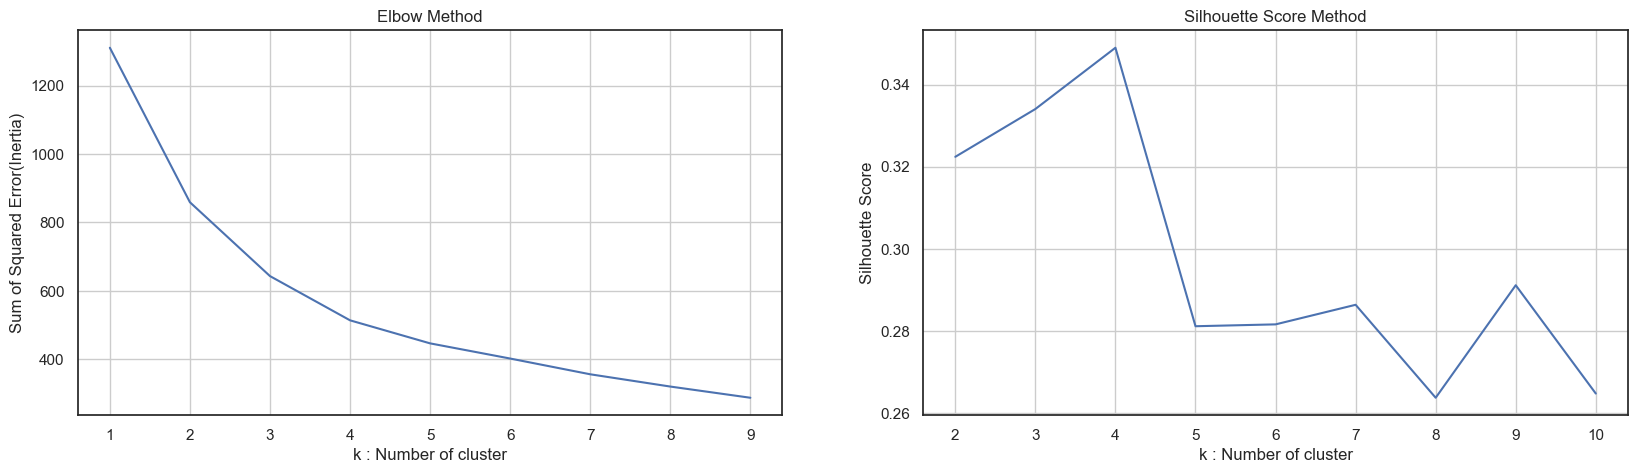

In [44]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(DF_pca)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error(Inertia)")
plt.grid(True)

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(DF_pca)
    labels = kmeans.labels_
    sil.append(silhouette_score(DF_pca, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.show()

## Apply The K_Means

In [45]:
kmean_set = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':1}

In [46]:
kmeans = KMeans(n_clusters=4, **kmean_set )
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels

array([1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 2, 3, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1])

In [47]:
# Assign the label
df_labeled=pd.concat([df,pd.Series(kmeans.labels_,name='label')],axis=1)  #I take the initial dataset 
#the one that it wasn't scaled
df_labeled

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  label  
0         9.44        56.2       5.82    553      1  
1         4.49        76.3       1.65   4090      2  
2        16.10        76.5       2.89   4460      2  
3        22.40        60.1       6.16   3530      1  
4         1.44        76.8       2.13  12200      2  
..         ...         ...        ...    ...    ...  
162       2.62        63.0       3.50   2970      2  
163      45.90        75.4       2.47  13500      2  
164      12.10        73.1       1.95   1310      2  
165      23.60        67.5       4.67   1310      1  
166      14.00        52.0       5.40   1460      1  

[167 rows x 11 columns]

In [48]:
# Number of countries in each cluster
df_labeled['label'].value_counts()

label
2    86
1    48
3    30
0     3
Name: count, dtype: int64

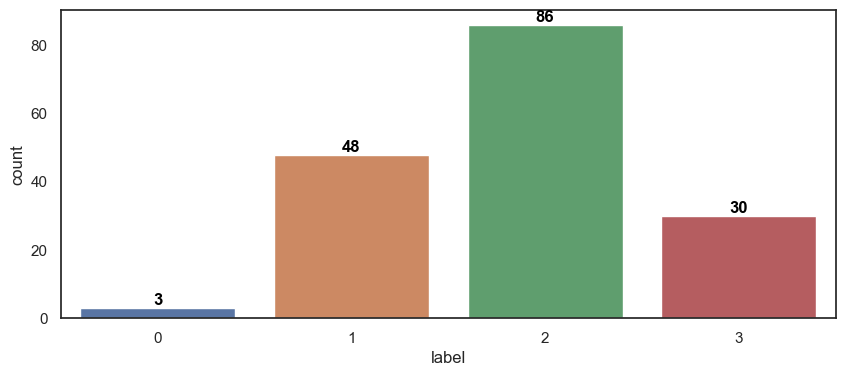

In [49]:
# counting number of labels
fig = plt.figure(figsize = (10,4))
ax = sns.countplot(x=df_labeled.label)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

## Low income and high child mortality is a sign of an economically backward nation.

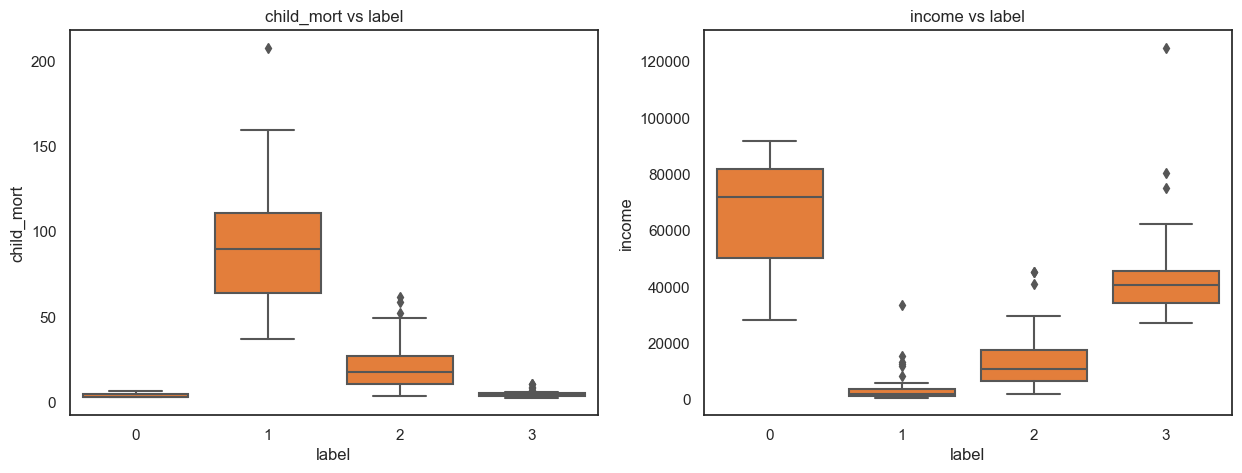

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'label', y = 'child_mort', data  = df_labeled, color = '#FF781F');
plt.title('child_mort vs label')

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y = 'income', data  = df_labeled, color = '#FF781F');
plt.title('income vs label')

plt.show()

In [51]:
df_labeled['label'].loc[df_labeled['label'] == 2] = 'Help Needed'
df_labeled['label'].loc[df_labeled['label'] == 3] = 'Might Need Help'
df_labeled['label'].loc[df_labeled['label'] == 0] = 'No Help Needed'
df_labeled['label'].loc[df_labeled['label'] == 1] ='Help Needed(More than other countries)'

In [52]:
df_labeled[df_labeled['label'] == 'No Help Needed']['country']

91     Luxembourg
98          Malta
133     Singapore
Name: country, dtype: object

In [53]:
df_labeled[df_labeled['label'] =='Help Needed(More than other countries)']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [54]:
df_labeled[df_labeled['label'] =='Might Need Help']['country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [55]:
df_labeled[df_labeled['label'] =='Help Needed']['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 86, dtype: object

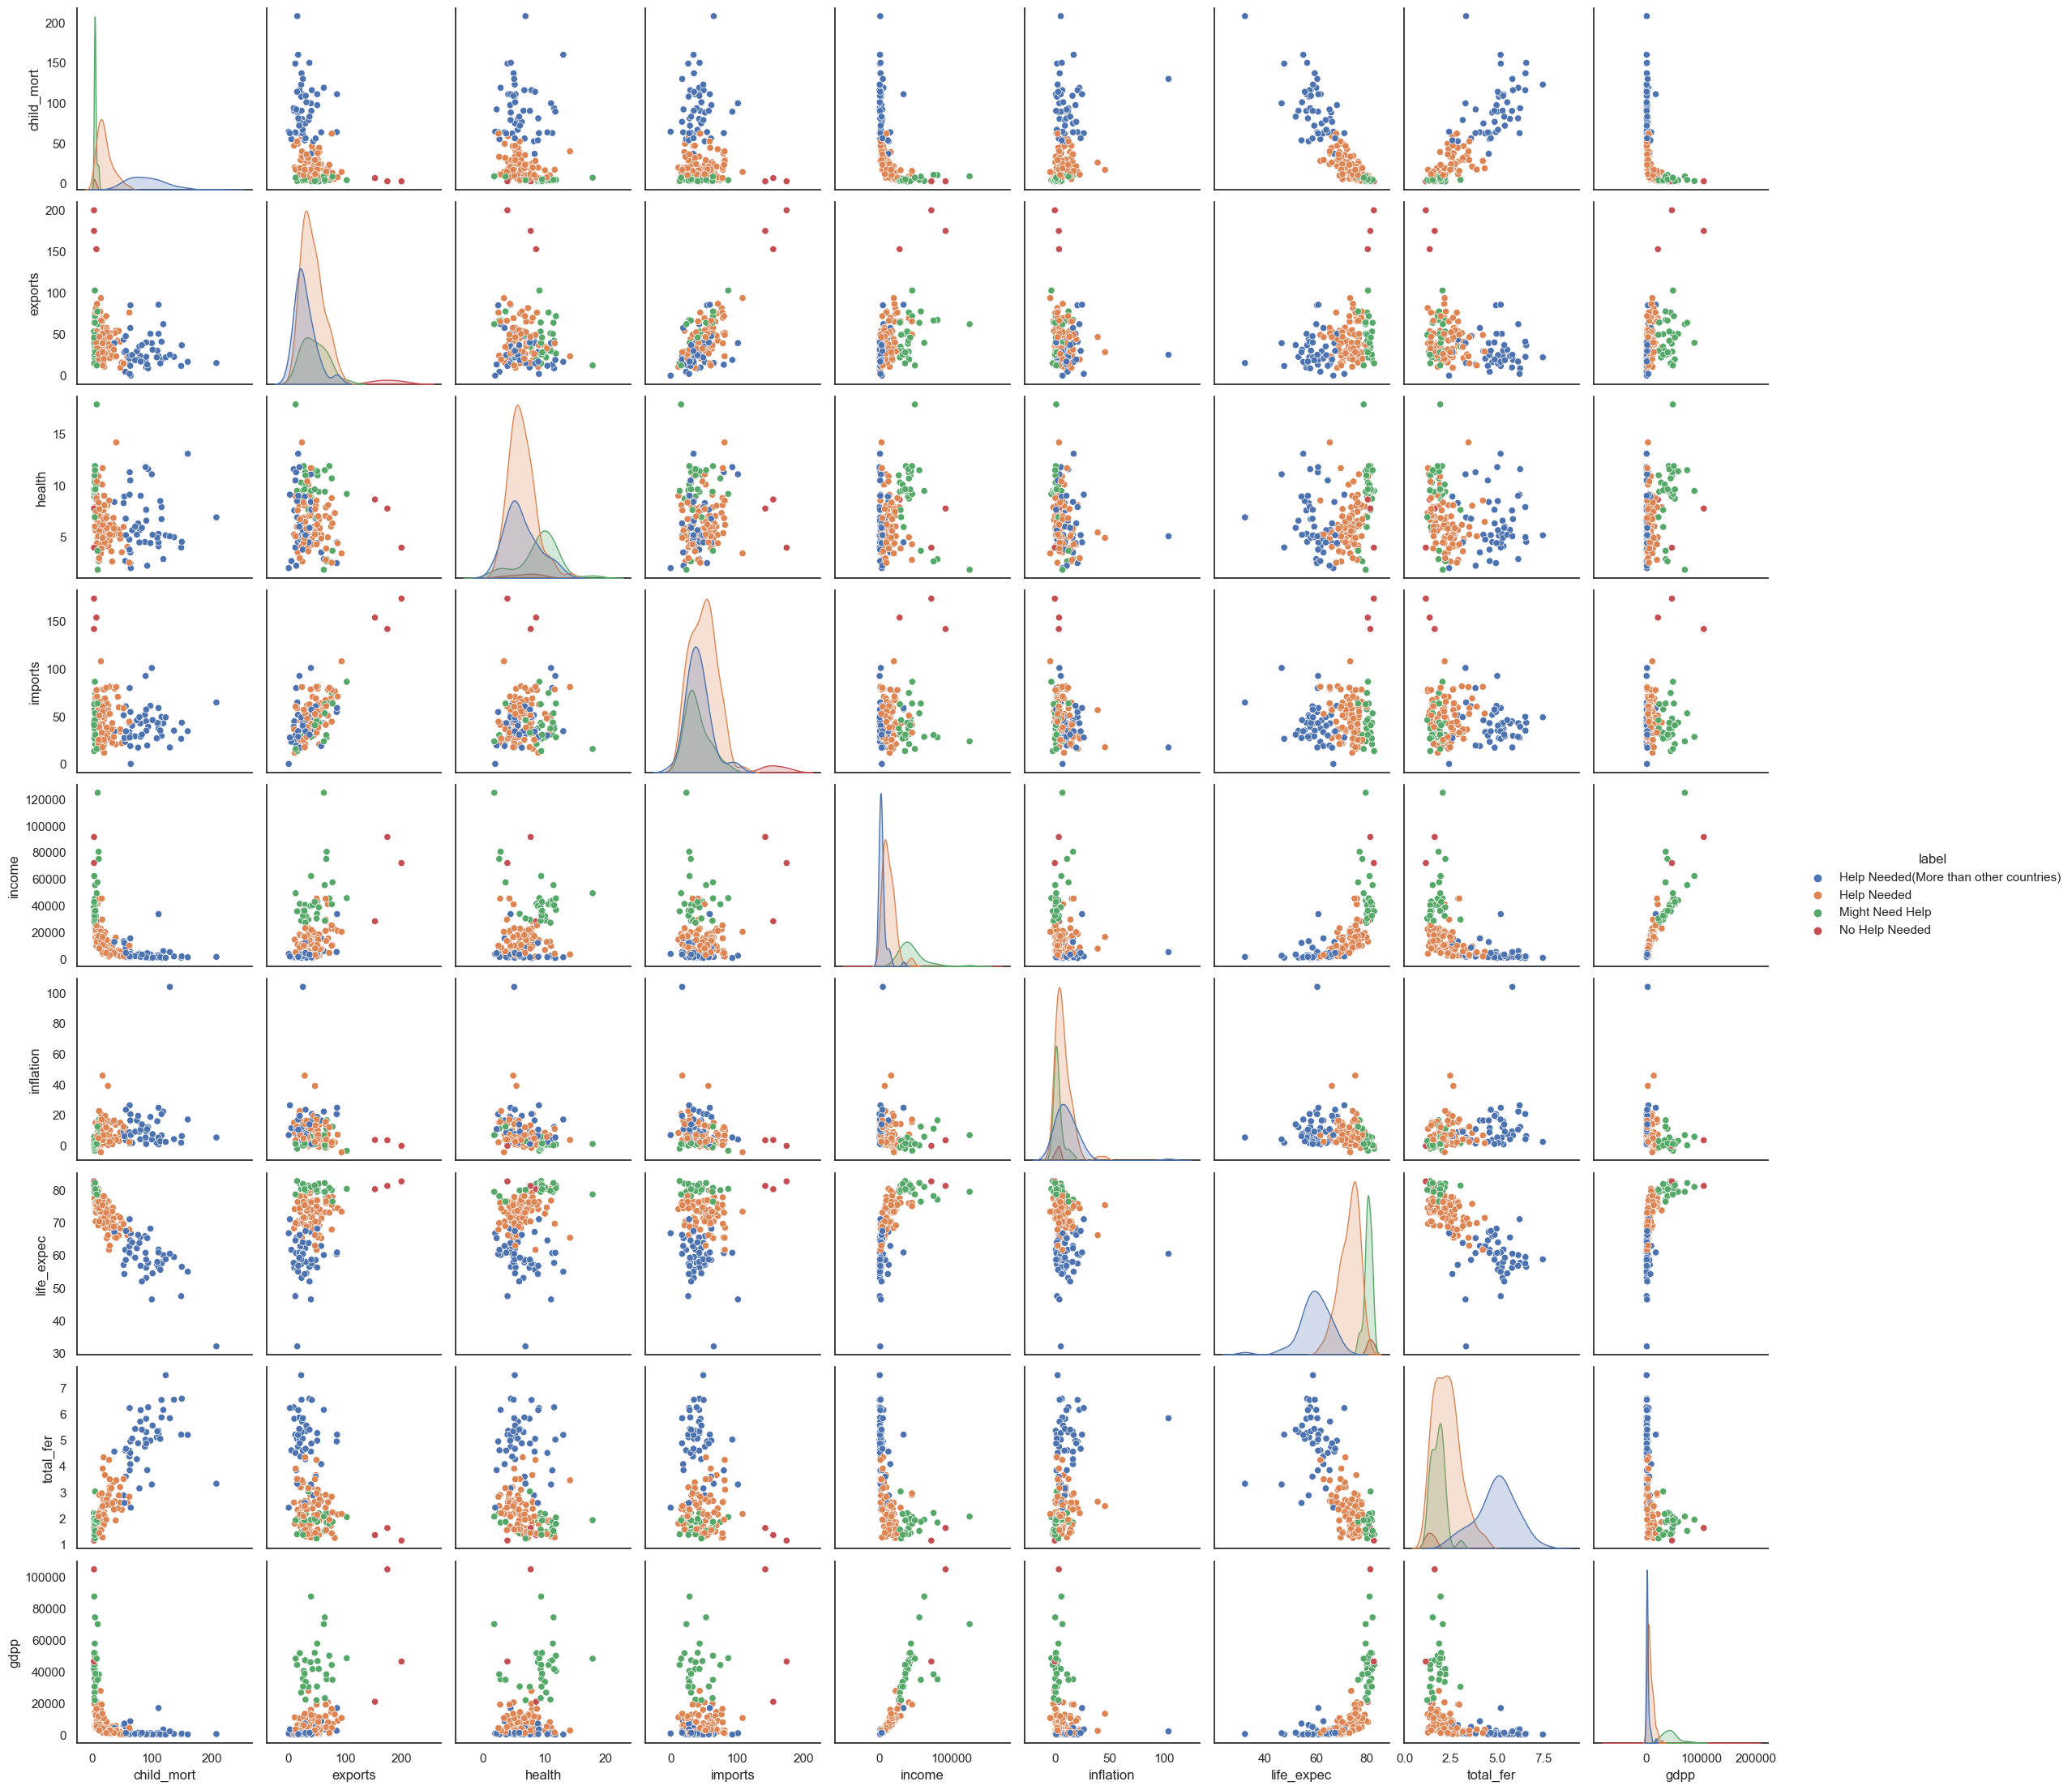

In [56]:
sns.pairplot(df_labeled, hue ='label')

In [57]:
fig = px.choropleth(df_labeled[['country','label']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_labeled['label'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green',
                                        'Help Needed(More than other countries)': 'Blue'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')